In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
data_directory_path = Path.joinpath(Path.cwd().parent, 'data')
df_queries = pd.read_csv(data_directory_path.joinpath('train.csv'), sep='#', names=['tables', 'joins', 'predicates', 'cardinalities'])

In [3]:
df_queries

,tables,joins,predicates,cardinalities
0,"title t,movie_info_idx mi_idx",t.id=mi_idx.movie_id,"t.kind_id,=,7,mi_idx.info_type_id,>,99",283812
1,title t,NaN,"t.production_year,>,2004",1107925
2,movie_info mi,NaN,"mi.info_type_id,<,4",3624977
3,"title t,movie_companies mc",t.id=mc.movie_id,"mc.company_id,<,27",134807
4,movie_keyword mk,NaN,"mk.keyword_id,<,55",54826
...,...,...,...,...
99995,"title t,movie_keyword mk",t.id=mk.movie_id,"mk.keyword_id,>,1951",3102738
99996,"title t,movie_companies mc,movie_keyword mk","t.id=mc.movie_id,t.id=mk.movie_id","t.kind_id,<,6,mc.company_type_id,<,2,mk.keywor...",738
99997,"title t,movie_info mi,movie_info_idx mi_idx","t.id=mi.movie_id,t.id=mi_idx.movie_id","t.kind_id,=,7,t.production_year,=,2006,mi.info...",103764
99998,"title t,movie_info_idx mi_idx,movie_keyword mk","t.id=mi_idx.movie_id,t.id=mk.movie_id","t.kind_id,=,7,t.production_year,<,1990,mk.keyw...",9


In [4]:
df_queries['logcardinalities'] = df_queries['cardinalities'].transform(np.log)

In [5]:
df_queries.describe()

,cardinalities,logcardinalities
count,1.000000e+05,100000.000000
mean,8.308338e+06,11.980897
std,2.904869e+07,4.441380
min,1.000000e+00,0.000000
25%,1.369175e+04,9.524549
50%,5.995230e+05,13.303890
75%,3.579772e+06,15.090810
max,4.604561e+08,19.947728


In [6]:
df_queries['cardinalities'].min()

1

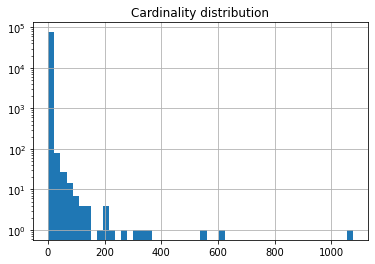

In [7]:
df_queries['cardinalities'].value_counts().hist(log=True, bins=50)
plt.title('Cardinality distribution')
plt.show()

In [13]:
def normalize_labels(labels, min_val=None, max_val=None):
    labels = np.array([np.log(float(l)) for l in labels])
    if min_val is None:
        min_val = labels.min()
        print("min log(label): {}".format(min_val))
    if max_val is None:
        max_val = labels.max()
        print("max log(label): {}".format(max_val))
    labels_norm = (labels - min_val) / (max_val - min_val)
    # Threshold labels
    labels_norm = np.minimum(labels_norm, 1)
    labels_norm = np.maximum(labels_norm, 0)
    return labels_norm, min_val, max_val


In [15]:
labels_norm, min_val, max_val = normalize_labels(df_queries['cardinalities'].values)
df_queries['normalized_labels'] = labels_norm

min log(label): 0.0
max log(label): 19.94772801931604


In [16]:
df_queries.describe()

,cardinalities,logcardinalities,normalized_labels
count,1.000000e+05,100000.000000,100000.000000
mean,8.308338e+06,11.980897,0.600615
std,2.904869e+07,4.441380,0.222651
min,1.000000e+00,0.000000,0.000000
25%,1.369175e+04,9.524549,0.477475
50%,5.995230e+05,13.303890,0.666938
75%,3.579772e+06,15.090810,0.756518
max,4.604561e+08,19.947728,1.000000


In [17]:
def unnormalize_labels(labels_norm, min_val, max_val):
    labels_norm = np.array(labels_norm, dtype=np.float32)
    labels = (labels_norm * (max_val - min_val)) + min_val
    return np.array(np.round(np.exp(labels)), dtype=np.int64)

In [18]:
df_queries['unnormalized_labels'] = unnormalize_labels(df_queries['normalized_labels'], min_val, max_val)

In [19]:
df_queries.describe()

,cardinalities,logcardinalities,normalized_labels,unnormalized_labels
count,1.000000e+05,100000.000000,100000.000000,1.000000e+05
mean,8.308338e+06,11.980897,0.600615,8.308332e+06
std,2.904869e+07,4.441380,0.222651,2.904867e+07
min,1.000000e+00,0.000000,0.000000,1.000000e+00
25%,1.369175e+04,9.524549,0.477475,1.369175e+04
50%,5.995230e+05,13.303890,0.666938,5.995225e+05
75%,3.579772e+06,15.090810,0.756518,3.579772e+06
max,4.604561e+08,19.947728,1.000000,4.604557e+08


In [8]:
encoded_data = pd.read_csv(data_directory_path.joinpath('encoded_data.csv'), header=None)

In [9]:
encoded_data[48].value_counts()

0.000000    1075
0.034748     606
0.055075     539
0.069496     348
0.089823     338
            ... 
0.539160       1
0.538927       1
0.949104       1
0.683907       1
0.579007       1
Name: 48, Length: 75922, dtype: int64

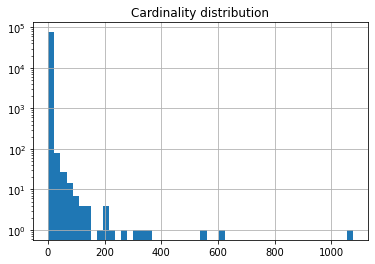

In [10]:
encoded_data[48].value_counts().hist(log=True, bins=50)
plt.title('Cardinality distribution')
plt.show()

In [11]:
encoded_data.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.342130,0.296190,0.223530,0.192430,0.361170,0.749310,0.268180,0.255170,0.227640,0.221670,...,0.008534,0.181720,0.387463,0.237752,0.012308,0.195050,0.340126,0.350926,0.075771,0.600615
std,0.474425,0.456578,0.416613,0.394211,0.480342,0.433413,0.443014,0.435959,0.419311,0.415372,...,0.052864,0.385616,0.479466,0.417996,0.072694,0.396241,0.447293,0.453000,1.102409,0.222651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.525180,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.477475
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666938
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.166667,0.000000,0.000000,0.906475,0.920863,0.000000,0.756518
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.997414,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000,1.000000,0.964029,1.000000


In [12]:
encoded_data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.629448
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.697724
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.892086,0.757147
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.592128
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.547026
